In [1]:
# import packages
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# construct validation set
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [17]:
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001))
my_conv_layer = partial(tf.keras.layers.Conv2D, activation="relu", padding="same")

model = tf.keras.models.Sequential([
    my_conv_layer(32,3,input_shape=[28,28,1]),
    tf.keras.layers.MaxPooling2D(2),
    my_conv_layer(64,3),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    my_dense_layer(256),
    my_dense_layer(10, activation="softmax")
])

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [19]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 48s 868us/sample - loss: 0.4490 - accuracy: 0.8535 - val_loss: 0.3584 - val_accuracy: 0.8898
Epoch 2/5
55000/55000 [==============================] - 48s 873us/sample - loss: 0.3210 - accuracy: 0.9011 - val_loss: 0.3216 - val_accuracy: 0.9016
Epoch 3/5
55000/55000 [==============================] - 43s 786us/sample - loss: 0.2866 - accuracy: 0.9156 - val_loss: 0.2865 - val_accuracy: 0.9190
Epoch 4/5
55000/55000 [==============================] - 45s 819us/sample - loss: 0.2673 - accuracy: 0.9228 - val_loss: 0.2795 - val_accuracy: 0.9198
Epoch 5/5
55000/55000 [==============================] - 43s 783us/sample - loss: 0.2475 - accuracy: 0.9308 - val_loss: 0.2628 - val_accuracy: 0.9248


In [28]:
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.0001))
my_conv_layer = partial(tf.keras.layers.Conv2D, activation="tanh", padding="valid")

model = tf.keras.models.Sequential([
    my_conv_layer(6,5,padding="same",input_shape=[28,28,1]),
    tf.keras.layers.AveragePooling2D(2),
    my_conv_layer(16,5),
    tf.keras.layers.AveragePooling2D(2),
    my_conv_layer(120,5),
    tf.keras.layers.Flatten(),
    my_dense_layer(84),
    my_dense_layer(10, activation="softmax")
])


In [30]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 22s 395us/sample - loss: 0.5367 - accuracy: 0.8098 - val_loss: 0.4006 - val_accuracy: 0.8622
Epoch 2/5
55000/55000 [==============================] - 20s 371us/sample - loss: 0.3936 - accuracy: 0.8607 - val_loss: 0.3551 - val_accuracy: 0.8772
Epoch 3/5
55000/55000 [==============================] - 24s 429us/sample - loss: 0.3515 - accuracy: 0.8769 - val_loss: 0.3597 - val_accuracy: 0.8718
Epoch 4/5
55000/55000 [==============================] - 21s 390us/sample - loss: 0.3264 - accuracy: 0.8858 - val_loss: 0.3253 - val_accuracy: 0.8852
Epoch 5/5
55000/55000 [==============================] - 21s 384us/sample - loss: 0.3081 - accuracy: 0.8933 - val_loss: 0.3168 - val_accuracy: 0.8930


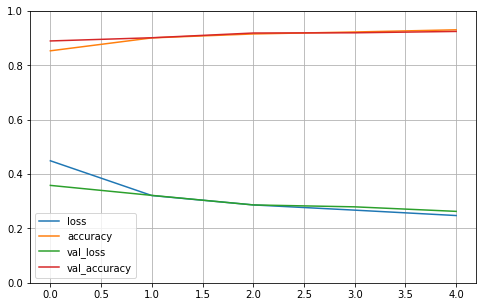

In [20]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [21]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[5119    0   52   65    7    2  297    0    1    0]
 [   0 5358    1   74    6    2    1    0    2    0]
 [  75    0 5123   33  148    0  117    0    0    0]
 [  52    1   20 5322   61    0   43    0    0    0]
 [   5    2  295  114 4946    1  149    0    0    0]
 [   0    0    0    0    0 5493    0   10    0    4]
 [ 387    1  263   93  172    0 4588    0    3    0]
 [   0    0    0    0    0   29    0 5386    0   73]
 [  14    0    3    4   11    9   12    0 5456    1]
 [   0    0    0    0    0   61    0  129    0 5304]]


In [22]:
model.evaluate(X_test,y_test) 

10000/10000 [==============================] - 2s 184us/sample - loss: 0.2914 - accuracy: 0.9183


[0.29137071001529696, 0.9183]

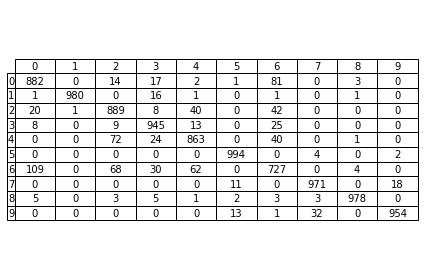

In [24]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create table and save to file
df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('conf_mat.pdf')